# Kaggle Titanic Analysis Project! 
In this notebook, I will be analysing the Titanic dataset to find what factors helped someone survive the sinking. 
In order to find the factors, we will answer some basic questions:
* Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
* What deck were the passengers on and how does that relate to their class?
* Where did the passengers come from?
* Who was alone and who was with family?

This questions will help us has a better understanding of the data and answer the final questions.

* What factors helped someone survive the sinking?

The data for this project can be obtain from the link below:

https://www.kaggle.com/c/titanic/data

We going to use the train.csv for the analysis

In [1]:
# We importing all the necessary libaries for the analysis and visualization
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's open the csv file with pandas
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# We used pandas.info() to get an overall info of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It seems like our dataset doesn’t contain a lot of missing data. Only the Cabin column has around 80% of it data missing. 

# Who were the passengers on the Titanic?

In [4]:
# We create a gender table that contain 0 as male and 1 as female, 
# so we can calculate the correlation coefficient between survival rate and gender
titanic_df["Gender"]=titanic_df.Sex.map({'male':0, 'female':1})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Let see who Who were the passengers on the Titanic?

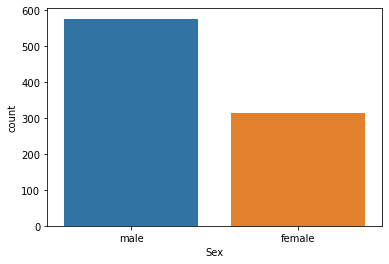

In [5]:
# Let check the gender ratio
sns.countplot('Sex', data=titanic_df)

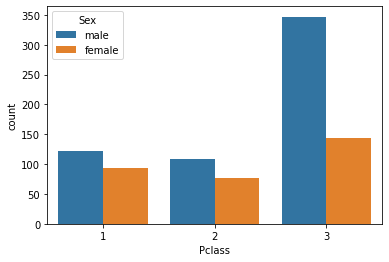

In [6]:
# let seperate the gender by classes
sns.countplot('Pclass', data=titanic_df, hue='Sex')

We can see that a lot of male in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children. 

In [7]:
# let drop the gender column since we dont need it anymore
titanic_df.drop(columns=['Gender'],inplace=True)

In [8]:
# We' ll treat anyone under 18 as child, and then use the apply function to create a new column

def male_female_child(passenger):
    # Take the Age and Sex
    ages,sex = passenger
    
    if ages < 18:
        return 'child'
    else:
        return sex

In [9]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


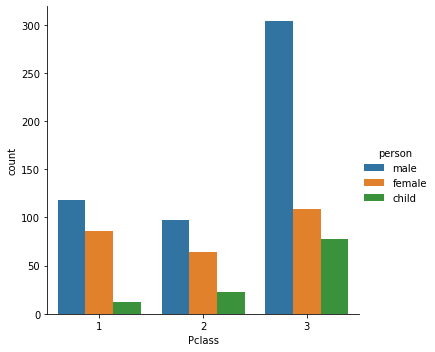

In [10]:
sns.catplot(x='Pclass', data=titanic_df, hue='person', kind='count')

Interesting, quite a bit of children in 3rd class and not so many in 1st! Let's create a distribution of the ages to get a more precise picture of the who the passengers were.

male      519
female    259
child     113
Name: person, dtype: int64

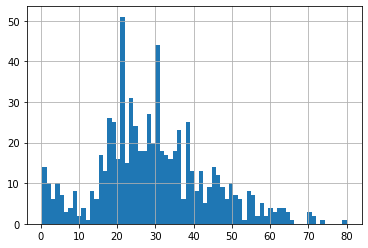

In [11]:
titanic_df['Age'].hist(bins=70)
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

As we can see, majority of the passengers are between 20 to 40 year old

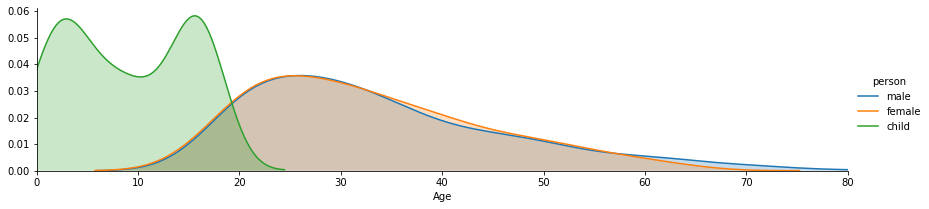

In [12]:
# Let use FaceGrid to see the passenger's Age distribution by gender

#Set the figure equal to a facetgrid with the pandas dataframe as its data source and set the hue to 'person'
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

#Set the x max limit
oldest=titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

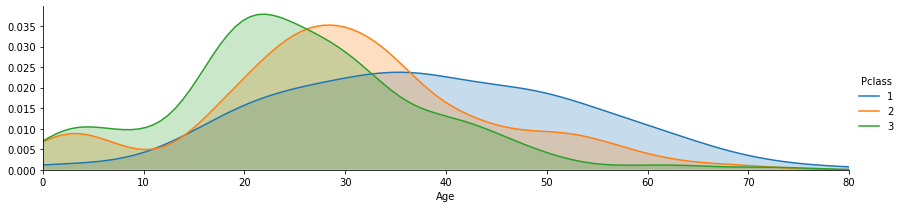

In [13]:
# Let's do the same for class by changing the hue argument

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest=titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

# What deck were the passengers on and how does that relate to their class?

In [14]:
# Let's take a quick look at the Cabin column
titanic_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G). Although Cabin column has a lot of missing data, panda and seaborn will ignore all the empty value.
So let's create a new column that contains that letter

In [15]:
titanic_df["cabins"]=titanic_df['Cabin'].str.slice(0,1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,cabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


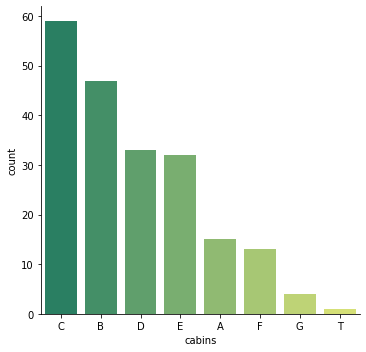

In [16]:
# let plot the cabins column by count number
sns.catplot(x='cabins',
            data=titanic_df, 
            kind='count',
            order=titanic_df['cabins'].value_counts().index,
            palette="summer")

Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code:

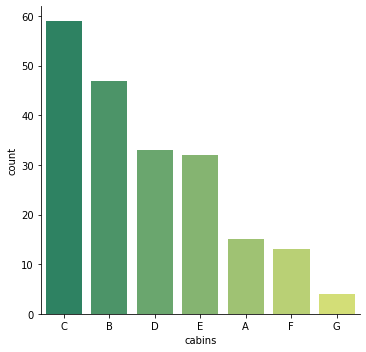

In [17]:
# Redefine cabin_df as everything but where the row was equal to 'T'
titanic_df = titanic_df[titanic_df.cabins != 'T']

#Replot the graph 
sns.catplot(x='cabins',
            data=titanic_df, 
            kind='count',
            order=titanic_df['cabins'].value_counts().index,
            palette="summer")

We can see that most of our passengers are on C and B cabins, and a few are on A, F and G. Let's calculate the mean of the fare and passenger class of each class to see what kind of passengers are belong in those deck.

In [18]:
grouped = titanic_df[['Fare','Pclass']].groupby(titanic_df['cabins']).mean()
grouped.sort_values(by=['Fare','Pclass'], ascending=False )

,Fare,Pclass
cabins,,
B,113.505764,1.000000
C,100.151341,1.000000
D,57.244576,1.121212
E,46.026694,1.312500
A,39.623887,1.000000
F,18.696792,2.384615
G,13.581250,3.000000


Interesting! The cabins with the higher count number will likely to have a higher fare and lower count number will have lower fare, which means most of the cabin data belong to first class. Notice that the majority of Titatinc's passengers belong to 3rd class, yet they have the least count number in the cabin column. 

Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

# Where did the passengers come from?

In [19]:
# Let's take another look at our original data and the Embarked column
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,cabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

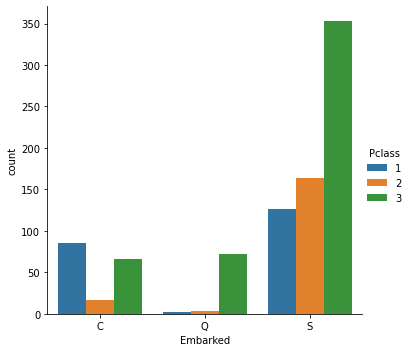

In [20]:
sns.catplot(x='Embarked', kind='count', data=titanic_df, hue ='Pclass', order=['C','Q','S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:

# Who was alone and who was with family?

In order to find out who is alone or with family, let's create a new column name 'Alone'. In this columnm, We'll add the parent/child column with the sibsp column. Then replace value any value greater than 0 with 0 and the value 0 will change to 1.

1 = 'Alone'

0 = 'With Family'

In [21]:
# create a function that replace value bigger than 0 with 1 and keep value 0 the same
def alone(n):
    sib, par = n
    
    if sib + par ==0:
        return 1
    else:
        return 0

In [22]:
# Create the Alone column and apply our function
titanic_df['Alone'] = titanic_df[['SibSp','Parch']].apply(alone, axis=1)
titanic_df['Alone']

<ipython-input-22-11bbc61557b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'] = titanic_df[['SibSp','Parch']].apply(alone, axis=1)


0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Alone, Length: 890, dtype: int64

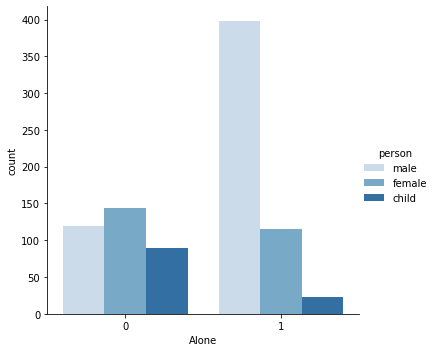

In [23]:
sns.catplot ('Alone',kind='count', hue='person',data=titanic_df, palette='Blues' )

There are a lot of male who was alone and a small amount childs who don't have a family

Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question:

# What factors helped someone survive the sinking?

Let's take a quick look at the correlation coefficient between survived columnn with other columns to see which factors helped someone survive 

In [24]:
titanic_df.corrwith(titanic_df.Survived, axis=0)

PassengerId   -0.005375
Survived       1.000000
Pclass        -0.340458
Age           -0.076094
SibSp         -0.035760
Parch          0.081248
Fare           0.257456
Alone         -0.202793
dtype: float64

Looking at the results, we can see a high degree of correlation between survived and gender. This positive correlation shows being a female has a higher chance of survival. Similar to fare rate, we see a positive low degree if correlation, which indicate the more you paid for the fare, there is a higher chance of survival. This correlation also connecting to the passenger class, the lower your Pclass, the higher chance of survival. So basically the closer you are to first class, the higher chances to live.

Let's dig deeper into the dataset.

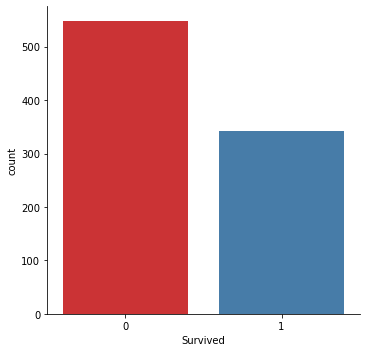

In [25]:
# Let's just get a quick overall view of survied vs died. 
sns.catplot('Survived',data=titanic_df,kind='count',palette='Set1')

0 = No 

1 = Yes

As we can see, more than 50% of the passengers did not survived the sinking. So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

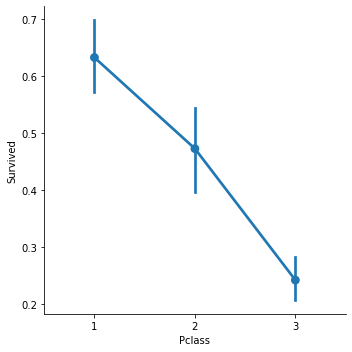

In [26]:
# let's use point plot, for quick view
sns.catplot('Pclass','Survived', kind='point', data=titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

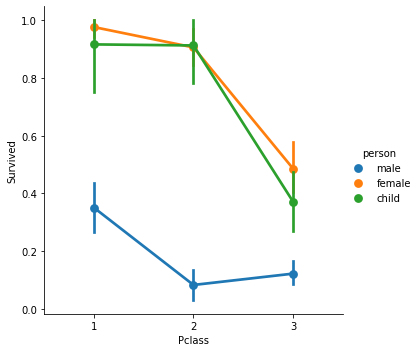

In [27]:
sns.catplot('Pclass','Survived', hue='person', kind='point', data=titanic_df)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

Let's see if being with alone or with family contribute to survival rate

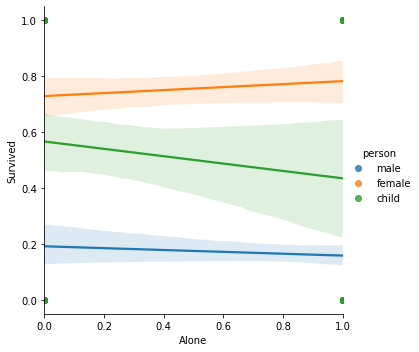

In [28]:
sns.lmplot('Alone','Survived',hue='person', data=titanic_df)

Look like the tend show being alone as a child decrease your chances of survival, but being alone as a female slightly increase your chances of survival. For male, being alone or with family doesn't affect their survival rate.

But what about age? Did being younger or older have an effect on survival rate?

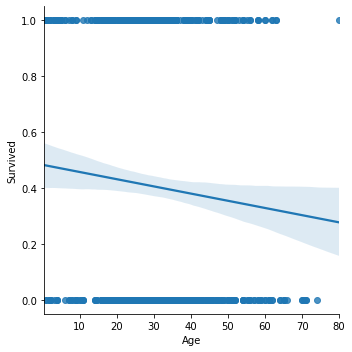

In [29]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived', data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

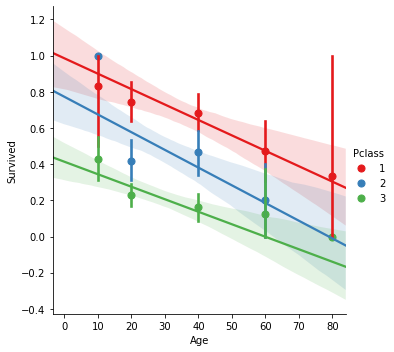

In [30]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived', hue='Pclass', data=titanic_df, palette='Set1', x_bins=generations,
          truncate=False)

Interesting find on the older 1st class passengers! There is a really high standard divation of the older people on the first class

What about if we relate gender and age with the survival set?

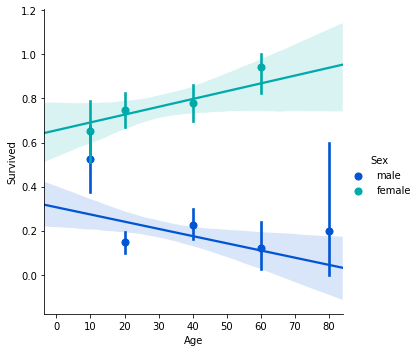

In [31]:
sns.lmplot('Age','Survived',hue='Sex', data=titanic_df, palette='winter', x_bins= generations,
          truncate=False)

It looks like older female passengers had a better chance of surviving than older male 

Awesome! we've gotten some really great insights on how gender,age, class and being with family all related to a passengers chance of survival. 

Lastly, Did the deck have an effect on the passengers survival rate?

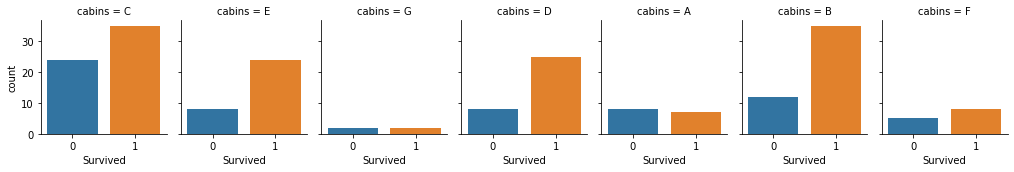

In [32]:
sns.catplot("Survived", col="cabins",data=titanic_df[titanic_df.cabins.notnull()], kind="count",
           height=2.5, aspect=.8)

The catplots show passengers in cabin C,E,D,B have a higher chance of survival thanother cabins. Now let's see who are the passengers in those cabins

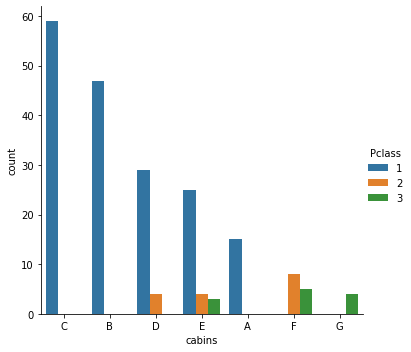

In [33]:
group1=titanic_df['PassengerId'].groupby(titanic_df['cabins']).count().sort_values(ascending=False)

sns.catplot(x='cabins', hue='Pclass',data=titanic_df, order=group1.index, kind='count')

The passengers who live in decks C,E,D and B are mainly from 1st class.It looks pretty unusual to see a low number of 2nd and 3rd class passengers because majority of Titanic's passengers are from there. Now we know that majority of the missing data in the Cabin column are likely to be from 2nd and 3 class passenger. 

Let's look at the price ticket for those cabins, to see if paying more will likely increase your survival rate

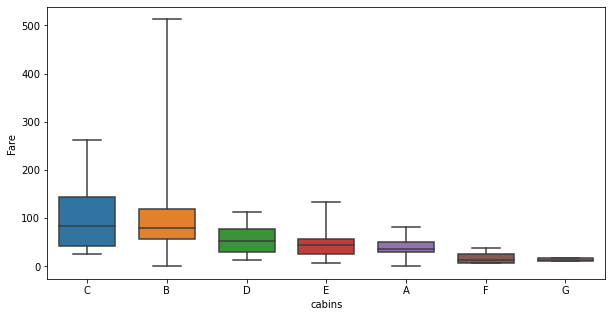

In [34]:
# lets use box plot to see the price distributio of each cabins
plt.figure(figsize=(10,5))
sns.boxplot(x='cabins', y='Fare',data=titanic_df, order=group1.index, 
            width =0.7, whis=np.inf)

The ticket price distributtion show cabins with high chances of survival cost more than cabins. Therefore, passengers who pay more to be in 1st class will likely to survive the sink, but this  

# Conclusion
The biggest factor that significantly increased passengers survival rate is being female or child because of women and children first policy. The second factor is being 1st and 2nd class passengers. For age, being older female slightly increase your chances of surival, but being old male will decrease your survival rate. Other factor like being alone or with family only effect children, the survival rate increase when a children has family members during the sinking. All of these survival factors don't have much impact on male passengers, being a male at any class or age dramatically decreases your chances of survival.
